# Epsilon Greedy


## Setup

As before, consider unstructural bandit problem. Suppose we have $k$ arms, each with random rewards $p_i = u_i + \epsilon$ where $\epsilon$ is draw from i.i.d. standard gaussian. (Note that we only require $\epsilon$ to be sub-gaussian for the analysis to go through)

The following codes is capturing the setup.

In [ ]:
import numpy as np
import pdb


class Gaussian_Arm:
  def __init__(self, num_arms, mu=None):
    '''
    num_arms: (int). the number of arms
    mu: (None or list-type). the mean of the reward of each arm.
        if set to None, a random vector will be generated.
    '''
    if num_arms <= 1 or not isinstance(num_arms, int):
      print('number of arms has an int that is at least two')
      return
    
    self.num_arms = num_arms
    #
    if mu:
      self.mu = np.asarray(mu)
      if len(self.mu) != num_arms:
        print('The lenth of mu does not match the number of arms')
        return
    else:
      self.mu = np.random.rand((num_arms))
    # 
    self.delta = max(self.mu) - min(self.mu)
    #

    # keep track of the rewards for the user
    self.rewards_history = []
    # keep track of how many times the arms have been pulled
    self.total_pull = 0 

  def pull_arm(self, arm_id=-1):
    if arm_id < 0 or arm_id >= self.num_arms:
      print('please specify arm id in the range of 0-%d' % (self.num_arms))
      return
    self.total_pull += 1
    # Generate reward
    reward = self.mu[arm_id] + np.random.randn()
    self.rewards_history.append(reward)
    return reward


  def genie_reward(self):
    '''
    the best expected reward after pulling self.total_pull times
    '''
    best_mu = max(self.mu)
    return self.total_pull * best_mu

  def my_rewards(self):
    return sum(self.rewards_history)

  def clear_reward_hist(self):
    self.rewards_history = []
    self.total_pull = 0



In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def choice_eps(c, k, t, Deltamin):
    return min(1, (c*k)/(t*Deltamin**2))

In [ ]:
means = [0, 1] # mean = 0, 2, N(0, 1) and N(2, 1)

In [ ]:
def greedy(N, c=100):
    env1 = Gaussian_Arm(len(means), means) 

    k = env1.num_arms
    # first k
    for i in range(k):
        env1.pull_arm(i)

    # after k
    t = k
    Delta = abs(means[0] - means[1])

    for i in range(N-k):
        t +=1
        p = np.random.random()
        eps = choice_eps(c, k, t, Delta)
        if p < eps:
            idx = np.random.choice(2)
        else:
            idx = max(range(len(means)), key=means.__getitem__)
        env1.pull_arm(idx)
    
    regret = env1.genie_reward() - env1.my_rewards()

    return regret

In [ ]:
def simulation(method):
    max_horizon=5000
    run_each_horizon = 200
    cache = []
    for n in range(2, max_horizon):  # [10**(i+1) for i in range(13)]
        subcache = 0
        for j in range(run_each_horizon):
            subcache += method(n)
        cache.append(subcache/run_each_horizon)
    plt.figure(0)
    plt.plot(cache, label='Regret')
    plt.title(method.__name__ +" - Regret vs n")
    plt.legend()

    plt.figure(1)
    plt.plot(cache, label='Regret after log')
    plt.title(method.__name__ +" - Regret vs n")
    plt.legend()
    plt.xscale('log')
    plt.legend()



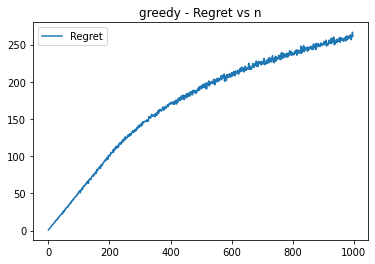

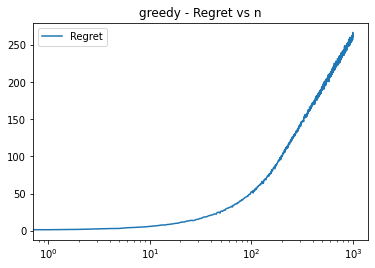

In [ ]:
simulation(greedy)

In [ ]:
# lower: logize